# Atividade (2.5): Treine uma MLP no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

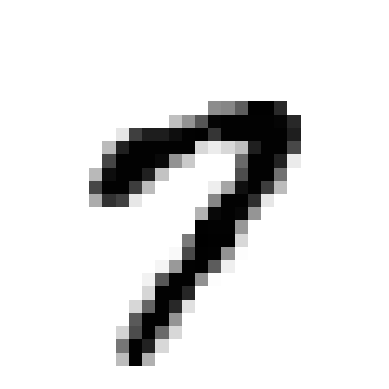

In [10]:
plt.imshow(X_train[15], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

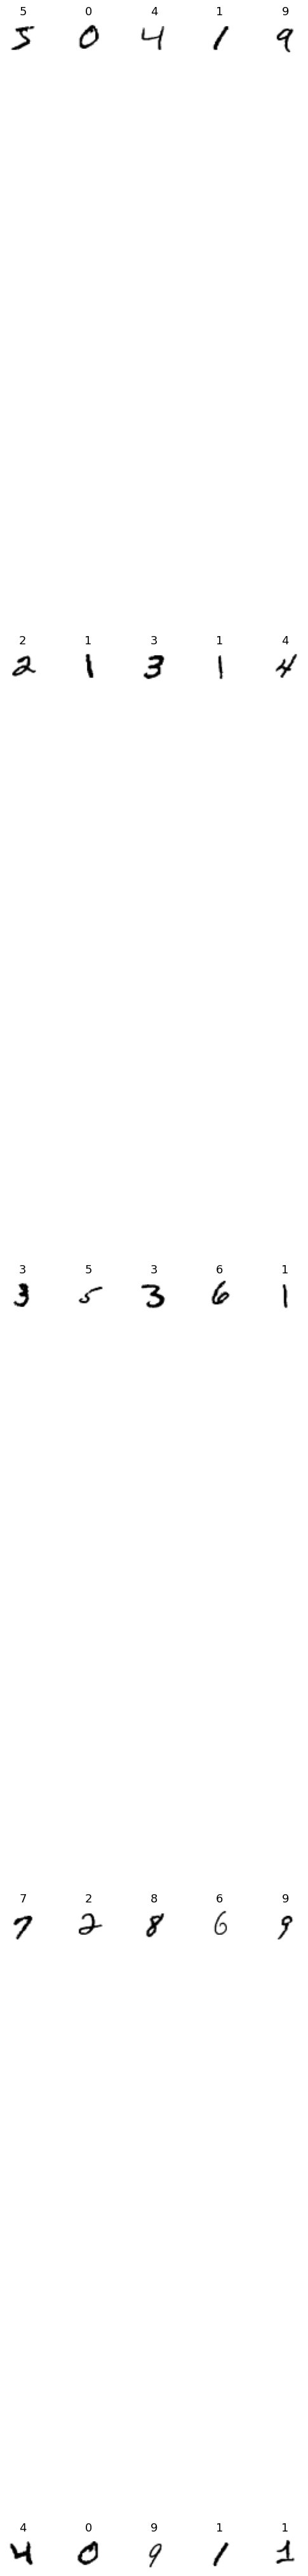

In [13]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows *1_2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

# pre processamento

In [50]:
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

# construindo arquitetura

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
hidden1 = model.layers[1]

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
hidden2 = model.layers[2]

In [22]:
weights, biases = hidden2.get_weights()

In [23]:
weights.shape

(300, 100)

In [24]:
biases.shape

(100,)

In [25]:
output = model.layers[3]

In [26]:
weights, biases = output.get_weights()

In [27]:
weights.shape

(100, 10)

In [28]:
biases.shape

(10,)

treinamento

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5960 - accuracy: 0.8464 - val_loss: 0.3075 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2916 - accuracy: 0.9167 - val_loss: 0.2479 - val_accuracy: 0.9322
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2395 - accuracy: 0.9316 - val_loss: 0.2137 - val_accuracy: 0.9382
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9412 - val_loss: 0.1821 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1780 - accuracy: 0.9487 - val_loss: 0.1675 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1571 - accuracy: 0.9553 - val_loss: 0.1526 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1409 - accuracy: 0.9594 - val_loss: 0.1387 - val_accuracy

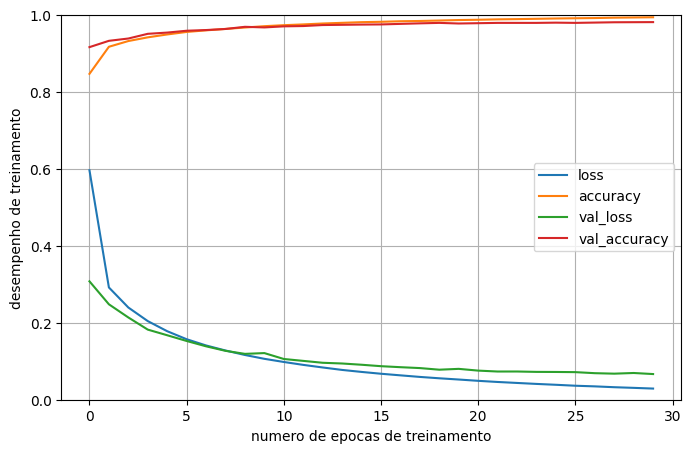

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("numero de epocas de treinamento")
plt.ylabel("desempenho de treinamento")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0275 - accuracy: 0.9939 - val_loss: 0.0686 - val_accuracy: 0.9814
Epoch 2/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0261 - accuracy: 0.9943 - val_loss: 0.0662 - val_accuracy: 0.9792
Epoch 3/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0248 - accuracy: 0.9945 - val_loss: 0.0662 - val_accuracy: 0.9804
Epoch 4/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9952 - val_loss: 0.0680 - val_accuracy: 0.9804
Epoch 5/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9955 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 6/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9958 - val_loss: 0.0650 - val_accuracy: 0.9810
Epoch 7/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0198 - accuracy: 0.9963 - val_loss: 0.0679 - val_accuracy

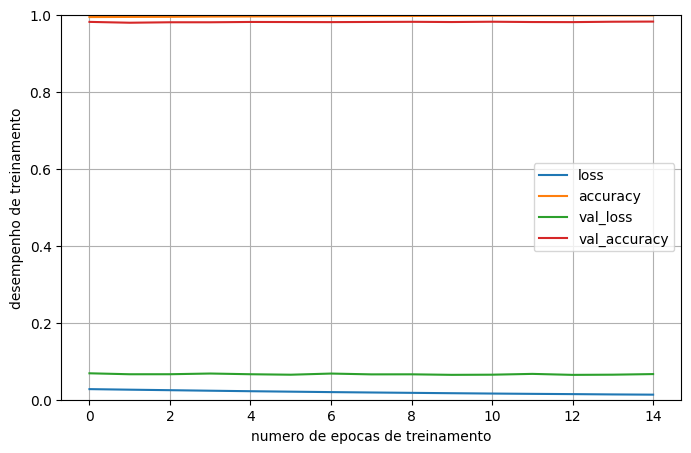

In [33]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("numero de epocas de treinamento")
plt.ylabel("desempenho de treinamento")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_valid, y_valid))

Epoch 1/120
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 0.0650 - val_accuracy: 0.9818
Epoch 2/120
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 3/120
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0113 - accuracy: 0.9988 - val_loss: 0.0650 - val_accuracy: 0.9804
Epoch 4/120
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0108 - accuracy: 0.9990 - val_loss: 0.0672 - val_accuracy: 0.9812
Epoch 5/120
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0103 - accuracy: 0.9990 - val_loss: 0.0664 - val_accuracy: 0.9824
Epoch 6/120
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 0.0656 - val_accuracy: 0.9822
Epoch 7/120
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0094 - accuracy: 0.9993 - val_loss: 0.0663 - val_ac

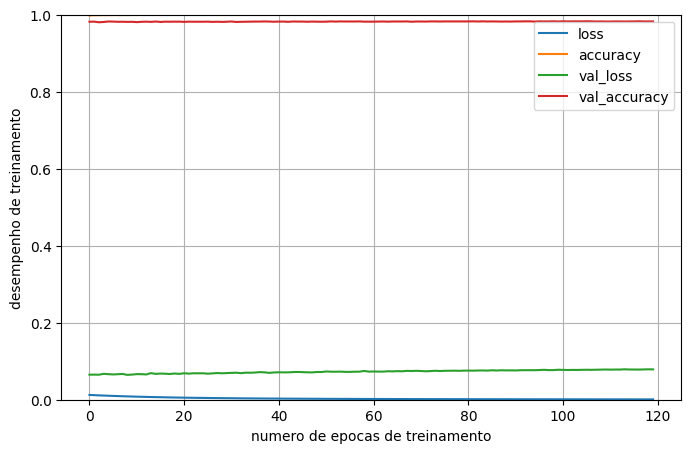

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("numero de epocas de treinamento")
plt.ylabel("desempenho de treinamento")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# testando o modelo

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0869 - accuracy: 0.9790


[0.08694235980510712, 0.9789999723434448]

In [45]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 35ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [46]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 26ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [47]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.979
Kappa:  0.976657250720335
Matriz de confusão: 
 [[ 969    0    0    0    2    1    2    1    4    1]
 [   0 1126    2    1    0    0    2    1    3    0]
 [   3    4 1004    2    4    0    3    4    8    0]
 [   0    1    7  986    0    6    0    2    3    5]
 [   0    0    4    1  965    0    1    3    1    7]
 [   3    0    0    7    1  867    4    1    5    4]
 [   3    2    1    1    5    5  940    0    1    0]
 [   2    6    6    4    0    0    0 1001    4    5]
 [   4    0    4    5    2    1    2    1  953    2]
 [   3    2    1    5    7    1    0    6    5  979]]


# salvando o modelo

In [51]:
model.save("modelo_mlp.h5")

In [52]:
model = keras.models.load_model("modelo_mlp.h5")

In [53]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


array([5, 5, 5, ..., 5, 5, 5])

In [54]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [55]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1407/1407 [==============================] - 9s 6ms/step - loss: 2.3104 - accuracy: 0.1042 - val_loss: 2.3137 - val_accuracy: 0.0942
Epoch 2/15
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3070 - accuracy: 0.1026 - val_loss: 2.3146 - val_accuracy: 0.1046
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3065 - accuracy: 0.1059 - val_loss: 2.3162 - val_accuracy: 0.1126
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3065 - accuracy: 0.1063 - val_loss: 2.3032 - val_accuracy: 0.1126
Epoch 5/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3062 - accuracy: 0.1038 - val_loss: 2.3239 - val_accuracy: 0.0942
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3063 - accuracy: 0.1080 - val_loss: 2.3109 - val_accuracy: 0.1046
Epoch 7/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3063 - accuracy: 0.1032 - val_loss: 2.3131 - val_accuracy: